https://www.kaggle.com/datasets/shreyag1103/brain-mri-scans-for-brain-tumor-classification/data

## LIBRERÍAS Y CARGA DE DATOS

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
import glob 
import tensorflow as tf

In [6]:
def load_images_from_folder(folder, label):
    images = []
    labels = []  # Prepare a list to store the labels of the images
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize images to uniform size
            images.append(img)
            labels.append(label)
    return images, labels

# Paths to your datasets
glioma_path = 'C:/Users/HP/Desktop/PFG/CODIGO/IMG_MULTI_PNG_RES/glioma_png_res'
meningioma_path = 'C:/Users/HP/Desktop/PFG/CODIGO/IMG_MULTI_PNG_RES/meningioma_png_res'
notumor_path = 'C:/Users/HP/Desktop/PFG/CODIGO/IMG_MULTI_PNG_RES/no_tumor_png_res'
pituitary_path = 'C:/Users/HP/Desktop/PFG/CODIGO/IMG_MULTI_PNG_RES/pituitario_png_res'

In [7]:

base_dir = 'C:/Users/HP/Desktop/PFG/CODIGO/IMG_MULTI_PNG_RES'

## EXPLORACIÓN Y VISUALIZACIÓN DE DATOS

In [8]:
pd.DataFrame(os.listdir(base_dir),columns=['Files_Name'])

,Files_Name
0,glioma_png_res
1,meningioma_png_res
2,no_tumor_png_res
3,pituitario_png_res


In [9]:
files = [i for i in glob.glob(base_dir + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pd.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,C:/Users/HP/Desktop/PFG/CODIGO/IMG_MULTI_PNG_R...,IMG_MULTI_PNG_RES\glioma_png_res
1,C:/Users/HP/Desktop/PFG/CODIGO/IMG_MULTI_PNG_R...,IMG_MULTI_PNG_RES\no_tumor_png_res
2,C:/Users/HP/Desktop/PFG/CODIGO/IMG_MULTI_PNG_R...,IMG_MULTI_PNG_RES\no_tumor_png_res
3,C:/Users/HP/Desktop/PFG/CODIGO/IMG_MULTI_PNG_R...,IMG_MULTI_PNG_RES\glioma_png_res
4,C:/Users/HP/Desktop/PFG/CODIGO/IMG_MULTI_PNG_R...,IMG_MULTI_PNG_RES\meningioma_png_res
...,...,...
1306,C:/Users/HP/Desktop/PFG/CODIGO/IMG_MULTI_PNG_R...,IMG_MULTI_PNG_RES\pituitario_png_res
1307,C:/Users/HP/Desktop/PFG/CODIGO/IMG_MULTI_PNG_R...,IMG_MULTI_PNG_RES\meningioma_png_res
1308,C:/Users/HP/Desktop/PFG/CODIGO/IMG_MULTI_PNG_R...,IMG_MULTI_PNG_RES\meningioma_png_res
1309,C:/Users/HP/Desktop/PFG/CODIGO/IMG_MULTI_PNG_R...,IMG_MULTI_PNG_RES\no_tumor_png_res


C:\Users\HP\AppData\Local\Temp\ipykernel_10932\1948858930.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe["Label"], palette=palette)


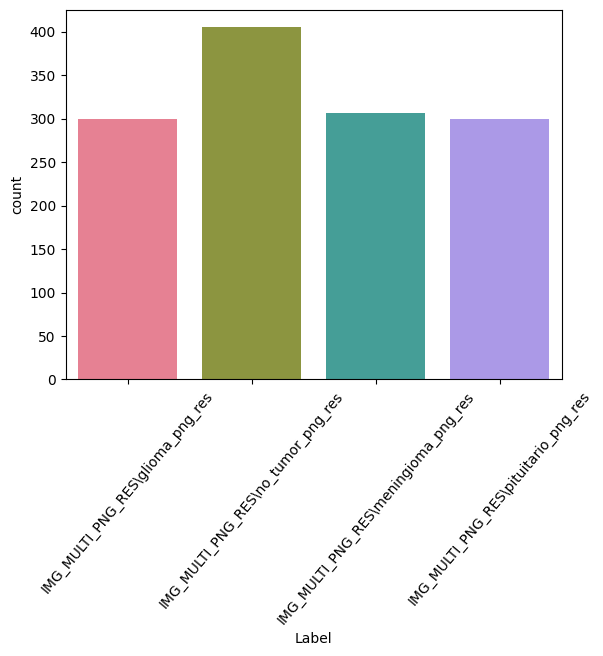

In [10]:
# Define una paleta de colores
palette = sns.color_palette("husl", len(dataframe["Label"].unique()))

# Crea el gráfico de barras con la paleta de colores
sns.countplot(x=dataframe["Label"], palette=palette)

# Rota las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=50)

# Muestra el gráfico
plt.show()


In [11]:

# Estadísticas descriptivas
dataframe.describe()

,Image,Label
count,1311,1311
unique,1311,4
top,C:/Users/HP/Desktop/PFG/CODIGO/IMG_MULTI_PNG_R...,IMG_MULTI_PNG_RES\no_tumor_png_res
freq,1,405


In [12]:
# Load images and labels from each category
glioma_images, glioma_labels = load_images_from_folder(glioma_path , 'Glioma')
meningioma_images, meningioma_labels = load_images_from_folder(meningioma_path , 'Meningioma')
notumor_images, notumor_labels = load_images_from_folder(notumor_path , 'No Tumor')
pituitario_images, pituitario_labels = load_images_from_folder(pituitary_path  , 'Pituitario')

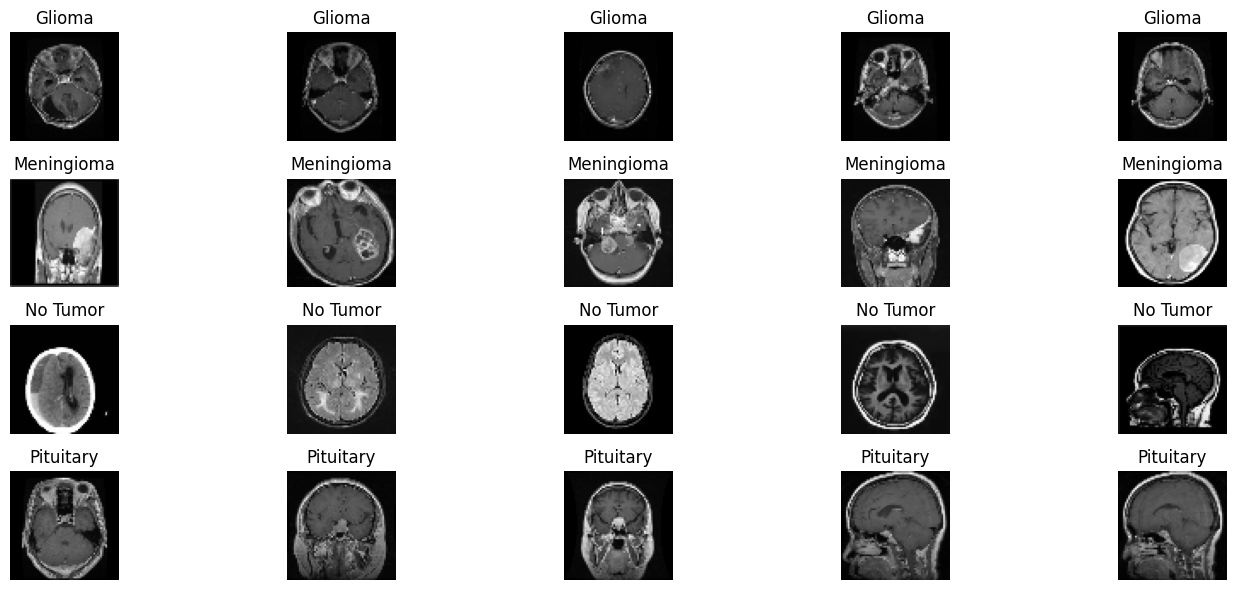

In [13]:
import matplotlib.pyplot as plt

# Assuming that glioma_images, meningioma_images, notumor_images, and pituitario_images 
# are lists containing image data for each category

# Display images
fig, axes = plt.subplots(4, 5, figsize=(15, 6))  # 4 rows of images, 5 columns

# Check if there are enough images in each list
if len(glioma_images) < 5 or len(meningioma_images) < 5 or len(notumor_images) < 5 or len(pituitario_images) < 5:
    raise ValueError("Not enough images loaded for displaying.")

# Display Glioma images
for i in range(5):
    ax = axes[0, i]  # Select the subplot for the first row
    ax.imshow(glioma_images[i], cmap='gray')
    ax.set_title('Glioma')
    ax.axis('off')

# Display Meningioma images
for i in range(5):
    ax = axes[1, i]  # Select the subplot for the second row
    ax.imshow(meningioma_images[i], cmap='gray')
    ax.set_title('Meningioma')
    ax.axis('off')

# Display No Tumor images
for i in range(5):
    ax = axes[2, i]  # Select the subplot for the third row
    ax.imshow(notumor_images[i], cmap='gray')
    ax.set_title('No Tumor')
    ax.axis('off')

# Display Pituitary images
for i in range(5):
    ax = axes[3, i]  # Select the subplot for the fourth row
    ax.imshow(pituitario_images[i], cmap='gray')
    ax.set_title('Pituitary')
    ax.axis('off')

plt.tight_layout()
plt.show()


## NORMALIZACIÓN, DIVISIÓN DEL Y PREPROCESAMIENTO DEL CONJUNTO DE DATOS

In [14]:
# Combine datasets
images = np.array(glioma_images + meningioma_images + notumor_images + pituitario_images)
labels = np.array(glioma_labels + meningioma_labels + notumor_labels + pituitario_labels)

# Normalize pixel values
images = images / 255.0

In [15]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [16]:
# Reshape for CNN input
X_train = X_train.reshape(-1, 64, 64, 1)
X_test = X_test.reshape(-1, 64, 64, 1)

In [17]:
from sklearn.preprocessing import LabelEncoder

# Convertir etiquetas de texto a enteros
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

## MODELO 1


In [18]:
input_shape = X_train.shape[1:]
input_shape

(64, 64, 1)

In [19]:
# Definir el modelo CNN
model = Sequential([
    Input(shape=input_shape),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), # Agregamos dropout para reducir el overfitting
    Dense(4, activation='softmax') # 4 clases: Glioma, Meningioma, No Tumor, Pituitario
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.3269 - loss: 1.3325 - val_accuracy: 0.7072 - val_loss: 1.0475
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.5871 - loss: 1.0110 - val_accuracy: 0.7262 - val_loss: 0.7148
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.6794 - loss: 0.7647 - val_accuracy: 0.7148 - val_loss: 0.7261
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.7355 - loss: 0.6717 - val_accuracy: 0.7757 - val_loss: 0.5691
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - accuracy: 0.7695 - loss: 0.5666 - val_accuracy: 0.7909 - val_loss: 0.5261
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.7995 - loss: 0.5481 - val_accuracy: 0.7757 - val_loss: 0.5429
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.8196 - loss: 0.4775 - val_accuracy: 0.7947 - val_loss: 0.4932
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - accuracy: 0.8265 - loss: 0.4416 - val_accuracy

In [20]:

hist_=pd.DataFrame(history.history)
hist_

,accuracy,loss,val_accuracy,val_loss
0,0.388359,1.271823,0.707224,1.047476
1,0.609733,0.962672,0.726236,0.714757
2,0.703244,0.731935,0.714829,0.726111
3,0.743321,0.651099,0.775665,0.569057
4,0.764313,0.581827,0.790875,0.526126
5,0.793893,0.536032,0.775665,0.542925
6,0.808206,0.488392,0.794677,0.493156
7,0.824427,0.453206,0.798479,0.471107
8,0.841603,0.396596,0.821293,0.461000
9,0.879771,0.344392,0.828897,0.450947


In [21]:
# Evaluar el modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print("Loss en los datos de prueba:", loss)
print("Precisión en los datos de prueba:", accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8485 - loss: 0.3973
Loss en los datos de prueba: 0.4509471356868744
Precisión en los datos de prueba: 0.8288973569869995


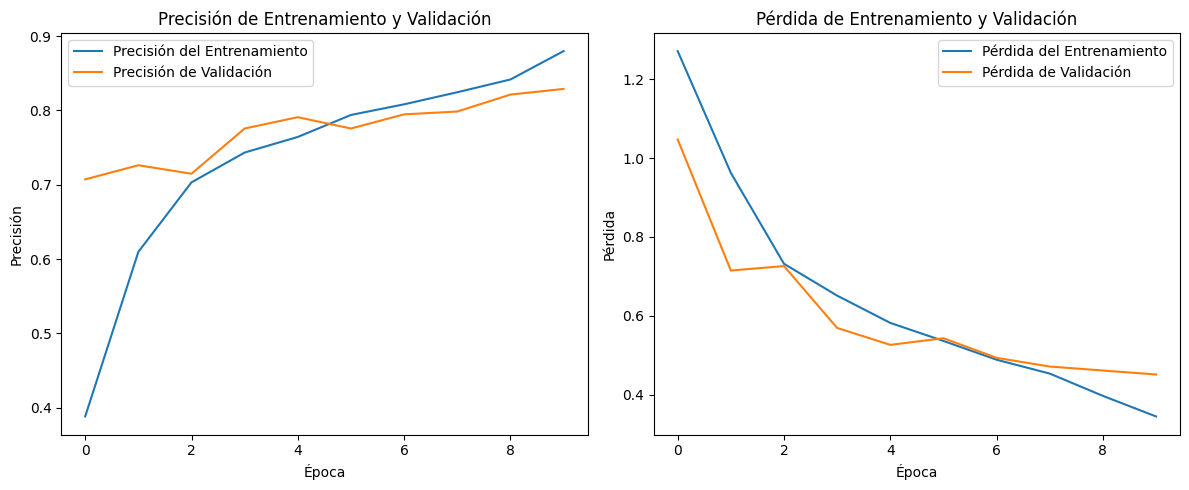

In [22]:
# Gráfico de precisión y pérdida durante el entrenamiento y la validación
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión del Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión de Entrenamiento y Validación')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida del Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida de Entrenamiento y Validación')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
import pandas as pd

# Make predictions with verbose output
y_pred_prob = model.predict(X_test, verbose=1)

# Convert probabilities to binary labels based on a threshold of 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Create a DataFrame to display actual and predicted labels
results = pd.DataFrame({
    'Etiqueta Actual': y_test_encoded.flatten(),
    'Etiqueta Predicha': y_pred.argmax(axis=1)  # Convierte las probabilidades predichas en etiquetas predichas
})

# Display the DataFrame
results


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


,Etiqueta Actual,Etiqueta Predicha
0,3,3
1,3,3
2,0,0
3,1,1
4,1,1
...,...,...
258,0,3
259,2,2
260,0,0
261,2,2


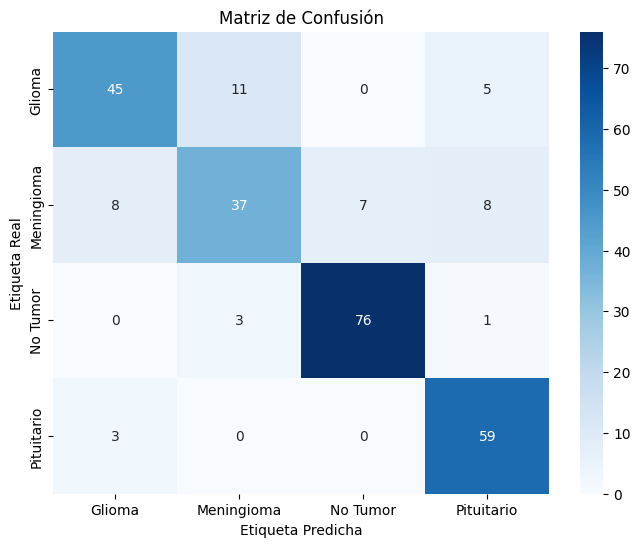

In [24]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test_encoded, y_pred.argmax(axis=1))

# Definir etiquetas para la matriz de confusión
labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitario']

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()


## MODELO 2

In [25]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

In [26]:
# Regularización con Dropout
model2 = Sequential([
     Input(shape=input_shape),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compilar el modelo
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [27]:
history2= model2.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.3209 - loss: 1.3399 - val_accuracy: 0.6540 - val_loss: 0.9737
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 193ms/step - accuracy: 0.5807 - loss: 1.0141 - val_accuracy: 0.7148 - val_loss: 0.8084
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.6757 - loss: 0.8388 - val_accuracy: 0.7490 - val_loss: 0.6785
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.6946 - loss: 0.7432 - val_accuracy: 0.7985 - val_loss: 0.5596
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.7911 - loss: 0.6086 - val_accuracy: 0.7795 - val_loss: 0.5201
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.7939 - loss: 0.5495 - val_accuracy: 0.7947 - val_loss: 0.5000
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.8099 - loss: 0.5076 - val_accuracy: 0.7681 - val_loss: 0.5590
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.8436 - loss: 0.4283 - val_accuracy: 

In [28]:
hist_=pd.DataFrame(history2.history)
hist_

,accuracy,loss,val_accuracy,val_loss
0,0.393130,1.273570,0.653992,0.973727
1,0.604962,0.977339,0.714829,0.808398
2,0.705153,0.771640,0.749049,0.678513
3,0.711832,0.701313,0.798479,0.559552
4,0.783397,0.594048,0.779468,0.520108
5,0.800573,0.516362,0.794677,0.500006
6,0.820611,0.468721,0.768061,0.559019
7,0.831107,0.437992,0.809886,0.474690
8,0.842557,0.397961,0.798479,0.476665
9,0.854962,0.375561,0.809886,0.497108


In [29]:
# Evaluar el modelo en los datos de prueba
loss, accuracy = model2.evaluate(X_test, y_test_encoded)
print("Loss en los datos de prueba:", loss)
print("Precisión en los datos de prueba:", accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8278 - loss: 0.4469
Loss en los datos de prueba: 0.4971083700656891
Precisión en los datos de prueba: 0.8098859190940857


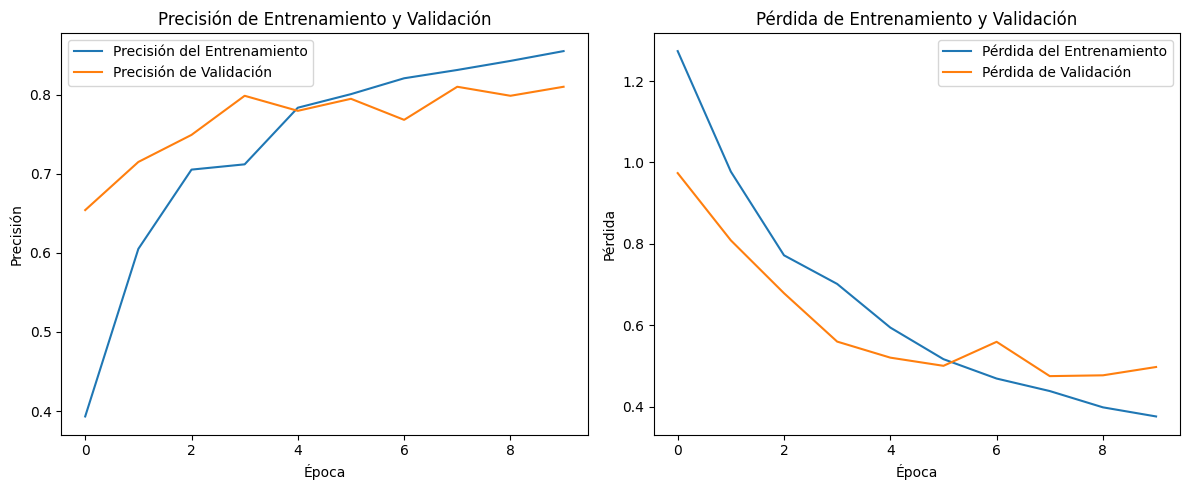

In [30]:
# Gráfico de precisión y pérdida durante el entrenamiento y la validación
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Precisión del Entrenamiento')
plt.plot(history2.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión de Entrenamiento y Validación')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Pérdida del Entrenamiento')
plt.plot(history2.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida de Entrenamiento y Validación')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
import pandas as pd

# Make predictions with verbose output
y_pred_prob = model2.predict(X_test, verbose=1)

# Convert probabilities to binary labels based on a threshold of 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Create a DataFrame to display actual and predicted labels
results = pd.DataFrame({
    'Etiqueta Actual': y_test_encoded.flatten(),
    'Etiqueta Predicha': y_pred.argmax(axis=1)  # Convierte las probabilidades predichas en etiquetas predichas
})

# Display the DataFrame
results

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


,Etiqueta Actual,Etiqueta Predicha
0,3,3
1,3,3
2,0,0
3,1,1
4,1,2
...,...,...
258,0,3
259,2,2
260,0,0
261,2,2


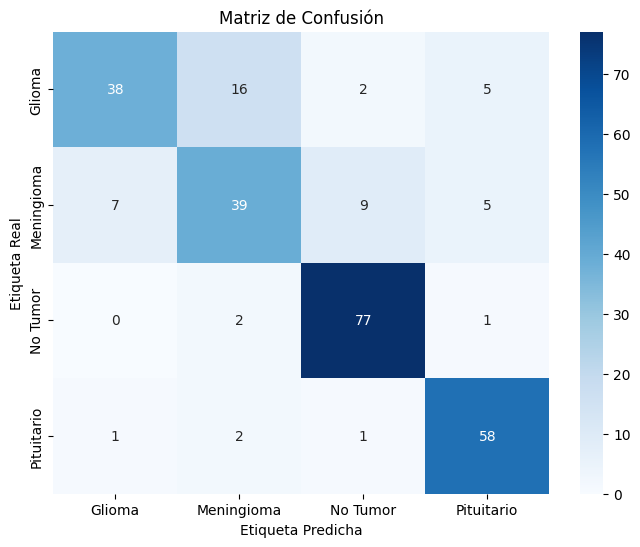

In [32]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test_encoded, y_pred.argmax(axis=1))

# Definir etiquetas para la matriz de confusión
labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitario']

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

## COMPARACIÓN MODELOS

In [33]:
def compare_models(history, history2, model, model2, X_test, y_test):
    # Comparar precisión
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Modelo 1 - Precisión en Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Modelo 1 - Precisión en Validación')
    plt.plot(history2.history['accuracy'], label='Modelo 2 - Precisión en Entrenamiento')
    plt.plot(history2.history['val_accuracy'], label='Modelo 2 - Precisión en Validación')
    plt.title('Comparación de la Precisión de los Modelos')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    # Comparar pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Modelo 1 - Pérdida en Entrenamiento')
    plt.plot(history.history['val_loss'], label='Modelo 1 - Pérdida en Validación')
    plt.plot(history2.history['loss'], label='Modelo 2 - Pérdida en Entrenamiento')
    plt.plot(history2.history['val_loss'], label='Modelo 2 - Pérdida en Validación')
    plt.title('Comparación de la Pérdida de los Modelos')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Evaluación en el conjunto de prueba
    score1 = model.evaluate(X_test, y_test, verbose=0)
    score2 = model2.evaluate(X_test, y_test, verbose=0)
    print(f"Modelo 1 - Pérdida: {score1[0]}, Precisión: {score1[1]}")
    print(f"Modelo 2 - Pérdida: {score2[0]}, Precisión: {score2[1]}")

In [34]:
def compare_models(history, history2, model, model2, X_test, y_test):
    # Comparar precisión
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Modelo 1 - Precisión en Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Modelo 1 - Precisión en Validación')
    plt.plot(history2.history['accuracy'], label='Modelo 2 - Precisión en Entrenamiento')
    plt.plot(history2.history['val_accuracy'], label='Modelo 2 - Precisión en Validación')
    plt.title('Comparación de la Precisión de los Modelos')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    # Comparar pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Modelo 1 - Pérdida en Entrenamiento')
    plt.plot(history.history['val_loss'], label='Modelo 1 - Pérdida en Validación')
    plt.plot(history2.history['loss'], label='Modelo 2 - Pérdida en Entrenamiento')
    plt.plot(history2.history['val_loss'], label='Modelo 2 - Pérdida en Validación')
    plt.title('Comparación de la Pérdida de los Modelos')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Evaluación en el conjunto de prueba
    score1 = model.evaluate(X_test, y_test_encoded, verbose=0)
    score2 = model2.evaluate(X_test, y_test_encoded, verbose=0)
    print(f"Modelo 1 - Pérdida: {score1[0]}, Precisión: {score1[1]}")
    print(f"Modelo 2 - Pérdida: {score2[0]}, Precisión: {score2[1]}")

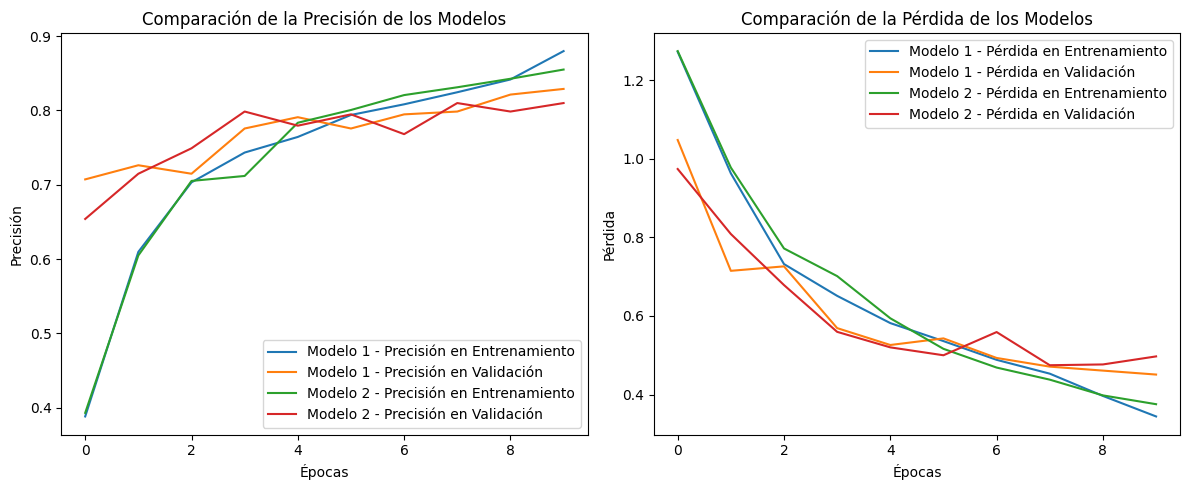

Modelo 1 - Pérdida: 0.4509471356868744, Precisión: 0.8288973569869995
Modelo 2 - Pérdida: 0.4971083700656891, Precisión: 0.8098859190940857


In [35]:
compare_models(history, history2, model, model2, X_test, y_test)

## PREDICCIÓN

In [36]:
def prepare_image(image_path):
    """Prepara una imagen para ser evaluada por el modelo CNN."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = cv2.resize(img, (64, 64))  # Redimensiona la imagen a 64x64
        img = img / 255.0  # Normaliza los valores de los píxeles
        img = np.expand_dims(img, axis=-1)  # Añade una dimensión de canal
        img = np.expand_dims(img, axis=0)  # Añade una dimensión de lote
        return img
    else:
        return None

In [37]:
def predict_tumor_model1(image_path, model):
    """Determina si la imagen contiene un tumor utilizando el modelo CNN."""
    img = prepare_image(image_path)
    if img is not None:
        prediction = model.predict(img)
        # Definimos las categorías correspondientes a nuestras clases
        categories = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitario']
        # Obtenemos la categoría con la probabilidad más alta
        predicted_category = categories[np.argmax(prediction)]
        return predicted_category
    else:
        return "La imagen no se encontró o no pudo leerse"


In [38]:
# Cargar el modelo entrenado (asegúrate de que el modelo está correctamente cargado)
# model = cargar_tu_modelo()  # Asume que tienes una función para cargar el modelo

# Ruta de la imagen a evaluar
image_path = 'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA NO CANCER.png'

# Hacer la predicción
result = predict_tumor_model1(image_path, model)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
No Tumor


In [39]:
# Ruta de la imagen a evaluar
image_path = 'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA GL.png'

# Hacer la predicción
result = predict_tumor_model1(image_path, model)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Glioma


In [40]:
# Ruta de la imagen a evaluar
image_path = 'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA MEN.png'

# Hacer la predicción
result = predict_tumor_model1(image_path, model)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Meningioma


In [41]:
# Ruta de la imagen a evaluar
image_path = 'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA PI.png'

# Hacer la predicción
result = predict_tumor_model1(image_path, model)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Pituitario


In [42]:
def predict_tumor_with_prob_model1(image_path, model):
    """Determina si la imagen contiene un tumor y devuelve la probabilidad de la predicción."""
    img = prepare_image(image_path)
    if img is not None:
        prediction = model.predict(img)
        # Definimos las categorías correspondientes a nuestras clases
        categories = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitario']
        # Obtenemos la categoría con la probabilidad más alta
        predicted_category = categories[np.argmax(prediction)]
        probability = prediction[0][np.argmax(prediction)]
        return (predicted_category, probability)
    else:
        return ("La imagen no se encontró o no pudo leerse", None)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


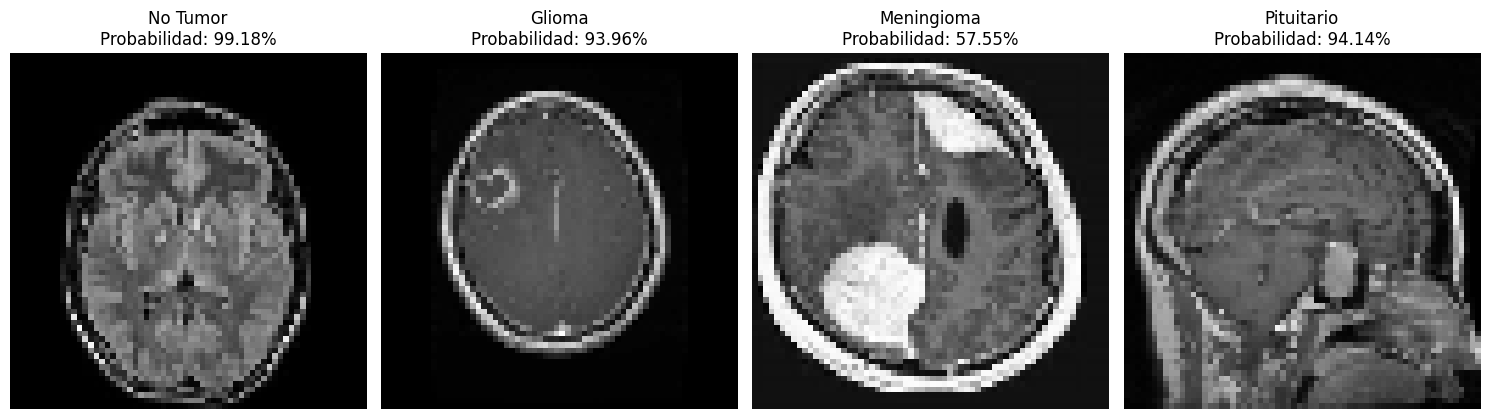

In [43]:
# Rutas de las imágenes
image_paths = [
    'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA NO CANCER.png',
    'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA GL.png',
    'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA MEN.png',
    'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA PI.png'
]

# Crear subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Procesar cada imagen y mostrar
for ax, image_path in zip(axes, image_paths):
    label, prob = predict_tumor_with_prob_model1(image_path, model)
    if label != "La imagen no se encontró o no pudo leerse":
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))
        ax.imshow(img, cmap='gray')
        ax.title.set_text(f'{label}\nProbabilidad: {prob:.2%}')
    else:
        ax.imshow(np.zeros((64, 64)), cmap='gray')
        ax.title.set_text(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [44]:
def predict_tumor_model2(image_path, model2):
    """Determina si la imagen contiene un tumor utilizando el modelo CNN."""
    img = prepare_image(image_path)
    if img is not None:
        prediction = model2.predict(img)
        # Definimos las categorías correspondientes a nuestras clases
        categories = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitario']
        # Obtenemos la categoría con la probabilidad más alta
        predicted_category = categories[np.argmax(prediction)]
        return predicted_category
    else:
        return "La imagen no se encontró o no pudo leerse"

In [45]:
# Ruta de la imagen a evaluar
image_path = 'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA NO CANCER.png'

# Hacer la predicción
result = predict_tumor_model2(image_path, model2)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
No Tumor


In [46]:
# Ruta de la imagen a evaluar
image_path = 'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA GL.png'

# Hacer la predicción
result = predict_tumor_model2(image_path, model2)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Glioma


In [47]:
# Ruta de la imagen a evaluar
image_path = 'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA MEN.png'

# Hacer la predicción
result = predict_tumor_model2(image_path, model2)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Meningioma


In [48]:
# Ruta de la imagen a evaluar
image_path = 'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA PI.png'

# Hacer la predicción
result = predict_tumor_model2(image_path, model2)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Pituitario


In [49]:
def predict_tumor_with_prob_model2(image_path, model2):
    """Determina si la imagen contiene un tumor y devuelve la probabilidad de la predicción."""
    img = prepare_image(image_path)
    if img is not None:
        prediction = model2.predict(img)
        # Definimos las categorías correspondientes a nuestras clases
        categories = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitario']
        # Obtenemos la categoría con la probabilidad más alta
        predicted_category = categories[np.argmax(prediction)]
        probability = prediction[0][np.argmax(prediction)]
        return (predicted_category, probability)
    else:
        return ("La imagen no se encontró o no pudo leerse", None)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


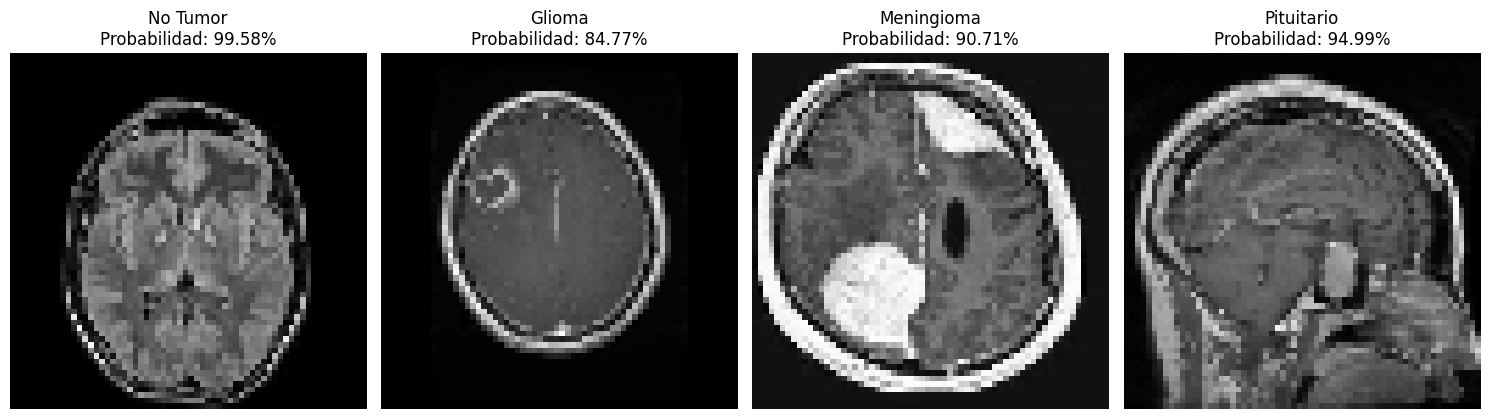

In [50]:
# Rutas de las imágenes
image_paths = [
    'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA NO CANCER.png',
    'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA GL.png',
    'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA MEN.png',
    'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA PI.png'
]

# Crear subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Procesar cada imagen y mostrar
for ax, image_path in zip(axes, image_paths):
    label, prob = predict_tumor_with_prob_model2(image_path, model2)
    if label != "La imagen no se encontró o no pudo leerse":
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))
        ax.imshow(img, cmap='gray')
        ax.title.set_text(f'{label}\nProbabilidad: {prob:.2%}')
    else:
        ax.imshow(np.zeros((64, 64)), cmap='gray')
        ax.title.set_text(label)
    ax.axis('off')

plt.tight_layout()
plt.show()